# Solubility Exploratory Data Analysis

## 1. Problem 🧐

Identify compound's property.

Data:
* CSV (IC50 values, MACCS keys, Klekota-Roth and PubChem substructure fingerprints)
* SDF (series of molfiles)

MACCS keys:
* List of 166 (keys) binary values (0 or 1) which characterize a molecule.
Details: https://github.com/rdkit/rdkit-orig/blob/master/rdkit/Chem/MACCSkeys.py

Klekota-Roth fingerprints:
* Set of 4860 chemical substructures (binary values).
Details: 

PubChem fingerprints:
* 881 binary bits (indicate the presence or absence of a certain group of chemical features in a compound).
Details: https://web.cse.ohio-state.edu/~zhang.10631/bak/drugreposition/list_fingerprints.pdf



### 1.1 Libraries 📖

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MolToSmiles

pd.set_option('display.max_columns', None)

colors_palette = ['#ffa600','#ff6361','#bc5090','#58508d', '#65345a']

### 1.2 Functions

In [2]:
def annotate(ax, fontsize=12):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ','), 
               (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
               xytext = (0, 6), textcoords = 'offset points', fontsize=fontsize)

## 2. Fingerprints

### 2.1 Data Analyse and Preprocessing 📊

In [3]:
df_solub = pd.read_csv("../data/raw/solubility_MACCSFP.csv")
print("Examples: {0}, columns: {1}".format(df_solub.shape[0],df_solub.shape[1]))
df_solub.head()

Examples: 1763, columns: 167


Solubility  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  \
0       500.0         0         0         0         0         0         0   
1       900.0         0         0         0         0         0         0   
2      1100.0         0         0         0         0         0         0   
3      1400.0         0         0         0         0         0         0   
4      1500.0         0         0         0         0         0         0   

   MACCSFP7  MACCSFP8  MACCSFP9  MACCSFP10  MACCSFP11  MACCSFP12  MACCSFP13  \
0         0         0         0          0          0          0          0   
1         0         0         0          0          0          0          0   
2         0         0         0          0          0          0          0   
3         0         0         0          0          0          0          0   
4         0         0         0          0          0          0          0   

   MACCSFP14  MACCSFP15  MACCSFP16  MACCSFP17  MACCSFP18  MACCSFP19  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          1          0          0          1   

   MACCSFP20  MACCSFP21  MACCSFP22  MACCSFP23  MACCSFP24  MACCSFP25  \
0          0          0          1          0          0          0   
1          0          0          1          0          0          0   
2          0          0          1          0          0          0   
3          0          0          1          0          0          0   
4          0          0          1          0          0          0   

   MACCSFP26  MACCSFP27  MACCSFP28  MACCSFP29  MACCSFP30  MACCSFP31  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP32  MACCSFP33  MACCSFP34  MACCSFP35  MACCSFP36  MACCSFP37  \
0          0          0          0          0          0          0   
1          0          0          0          0          1          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP38  MACCSFP39  MACCSFP40  MACCSFP41  MACCSFP42  MACCSFP43  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          1          0   
3          1          0          0          0          0          0   
4          1          0          0          0          0          0   

   MACCSFP44  MACCSFP45  MACCSFP46  MACCSFP47  MACCSFP48  MACCSFP49  \
0          0          0          0          0          0          0   
1          0          0          1          1          0          0   
2          0          0          1          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP50  MACCSFP51  MACCSFP52  MACCSFP53  MACCSFP54  MACCSFP55  \
0          0          0          0          1          0          0   
1          0          0          0          0          1          0   
2          0          0          0          0          0          0   
3          0          0          0          1          0          0   
4          0          1          0          0          0          1   

   MACCSFP56  MACCSFP57  MACCSFP58  MACCSFP59  MACCSFP60  MACCSFP61  \
0    

In [4]:
df_solub_pubch = pd.read_csv("../data/raw/solubility_PubchemFP.csv")
print("Examples: {0}, columns: {1}".format(df_solub_pubch.shape[0],df_solub_pubch.shape[1]))
df_solub_pubch.head()

Examples: 1763, columns: 882


Solubility  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
0       500.0           1           1           1           1           0   
1       900.0           1           1           1           0           0   
2      1100.0           1           1           0           0           0   
3      1400.0           1           1           0           0           0   
4      1500.0           1           1           1           0           0   

   PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  \
0           0           0           0           0           1            1   
1           0           0           0           0           1            1   
2           0           0           0           0           1            1   
3           0           0           0           0           1            1   
4           0           0           0           0           1            1   

   PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  PubchemFP15  \
0            1            1            0            1            1   
1            1            1            0            1            1   
2            1            0            0            1            0   
3            1            1            0            1            1   
4            1            1            0            1            1   

   PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  PubchemFP20  \
0            1            0            1            1            1   
1            0            0            1            1            0   
2            0            0            1            1            0   
3            0            0            1            1            0   
4            1            0            1            1            0   

   PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  PubchemFP25  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP26  PubchemFP27  PubchemFP28  PubchemFP29  PubchemFP30  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP31  PubchemFP32  PubchemFP33  PubchemFP34  PubchemFP35  \
0            0            0            0            0            0   
1            0            0            1            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            1            0            0   

   PubchemFP36  PubchemFP37  PubchemFP38  PubchemFP39  PubchemFP40  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            1            0            0            0   
3            0            1            0            0            0   
4            0            0            0            0            0   

   PubchemFP41  PubchemFP42  PubchemFP43  PubchemFP44  PubchemFP45  \
0            0            0            0            0            0   
1            0            0            1            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP46  PubchemFP47  PubchemFP48  PubchemFP49  PubchemFP50  \
0            0            0            0            0 

In [5]:
df_solub_klek = pd.read_csv("../data/raw/solubility_KlekFP.csv")
print("Examples: {0}, columns: {1}".format(df_solub_klek.shape[0],df_solub_klek.shape[1]))
df_solub_klek.head()

Examples: 1763, columns: 4861


Solubility  KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  KRFP8  KRFP9  \
0       500.0      1      0      0      0      0      0      0      0      0   
1       900.0      1      0      0      0      0      0      0      0      0   
2      1100.0      0      0      0      0      0      0      0      0      0   
3      1400.0      0      0      0      0      0      0      0      0      0   
4      1500.0      1      0      0      0      0      0      0      0      0   

   KRFP10  KRFP11  KRFP12  KRFP13  KRFP14  KRFP15  KRFP16  KRFP17  KRFP18  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       1       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP19  KRFP20  KRFP21  KRFP22  KRFP23  KRFP24  KRFP25  KRFP26  KRFP27  \
0       0       0       0       0       0       0       0       0       0   
1       0       1       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP28  KRFP29  KRFP30  KRFP31  KRFP32  KRFP33  KRFP34  KRFP35  KRFP36  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP37  KRFP38  KRFP39  KRFP40  KRFP41  KRFP42  KRFP43  KRFP44  KRFP45  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP46  KRFP47  KRFP48  KRFP49  KRFP50  KRFP51  KRFP52  KRFP53  KRFP54  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP55  KRFP56  KRFP57  KRFP58  KRFP59  KRFP60  KRFP61  KRFP62  KRFP63  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP64  KRFP65  KRFP66  KRFP67  KRFP68  KRFP69  KRFP70  KRFP71  KRFP72  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP73  KRFP74  KRFP75  KRFP76  KRFP77  KRFP78  KRFP79  KRFP80  KRFP81  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0 

### 2.1.1 Missing/Invalid values 🔎

In [6]:
# count missing values
print("Missing values: {0}".format(df_solub.isnull().sum().sum()))
print("Missing values: {0}".format(df_solub_pubch.isnull().sum().sum()))
print("Missing values: {0}".format(df_solub_klek.isnull().sum().sum()))

Missing values: 0
Missing values: 0
Missing values: 0


In [7]:
# Convert non-numeric entries to NaN (everything that cannot be converted to a numeric value)
df_solub2 = (df_solub.drop(df_solub.columns, axis=1)
         .join(df_solub[df_solub.columns].apply(pd.to_numeric, errors='coerce')))

In [8]:
print("Invalid values: {0}".format(df_solub2.isnull().sum().sum()))

Invalid values: 0


### 2.1.2 Class balance/Outliers

In [9]:
df_solub2['Solubility'].describe()

count    1.763000e+03
mean     1.877717e+05
std      3.277080e+05
min      1.000000e+02
25%      5.400000e+03
50%      3.630000e+04
75%      1.950000e+05
max      1.513600e+06
Name: Solubility, dtype: float64

In [10]:
inactive = df_solub2[df_solub2['Solubility']<=5000].count()[0]
active = df_solub2[df_solub2['Solubility']>5000].count()[0]
all_solub = df_solub2['Solubility'].count()
print('For 5000: {0} Active compounds and {1} inactive compounds'.format(active, inactive))
print('For 5000: {:.2%} active compounds and {:.2%} inactive compounds'.format(active/all_solub, inactive/all_solub))

For 5000: 1341 Active compounds and 422 inactive compounds
For 5000: 76.06% active compounds and 23.94% inactive compounds


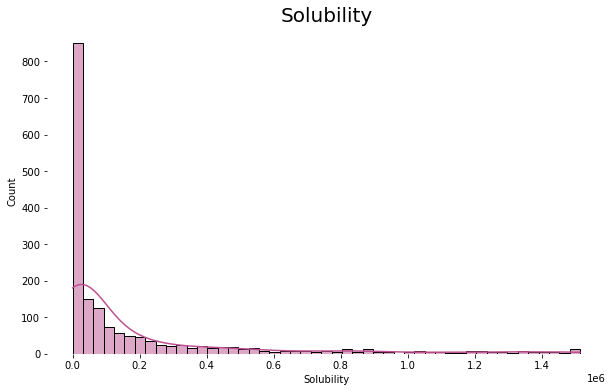

In [13]:
plt.figure(figsize=(10,6))
plt.title('Solubility', fontsize=20)
solub_plot = sns.histplot(data=df_solub2, x='Solubility', kde=True, color=colors_palette[2])
sns.despine(left=True, bottom=True)

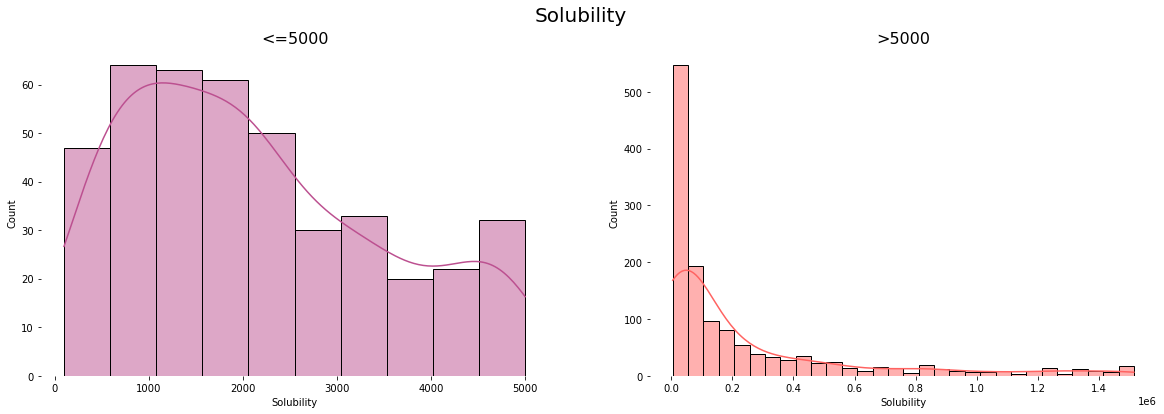

In [14]:
solub_1 = df_solub2[df_solub2['Solubility']<=5000]
solub_2 = df_solub2[df_solub2['Solubility']>5000]

fig, axes = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Solubility', fontsize=20)
left = sns.histplot(data=solub_1, x='Solubility', ax = axes[0], kde=True, color=colors_palette[2])
right = sns.histplot(data=solub_2, x='Solubility', ax = axes[1], kde=True, color=colors_palette[1])
axes[0].set_title('<=5000', fontsize=16)
axes[1].set_title('>5000', fontsize=16)

sns.despine(left=True, bottom=True)

In [15]:
df_scaled = StandardScaler().fit_transform(df_solub['Solubility'][:,np.newaxis]);
low_range = df_scaled[df_scaled[:,0].argsort()][:10]
high_range= df_scaled[df_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.57284212]
 [-0.57284212]
 [-0.57284212]
 [-0.57284212]
 [-0.57284212]
 [-0.57284212]
 [-0.57253689]
 [-0.57253689]
 [-0.57253689]
 [-0.57253689]]

outer range (high) of the distribution:
[[4.04690914]
 [4.04690914]
 [4.04690914]
 [4.04690914]
 [4.04690914]
 [4.04690914]
 [4.04690914]
 [4.04690914]
 [4.04690914]
 [4.04690914]]


/home/ewelina/miniconda3/envs/admet/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


### 2.1.3 Calculate logarithm

1. Convert nM to M.
2. Apply -log10.

solubility -> >5000 active

logarithm of solubility ->  < 5.3 active

In [22]:
df_solub2 = df_solub2.assign(Solubility = -np.log10(df_solub2.Solubility*(10**-9)))
df_solub2

Solubility  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  \
0       6.301030         0         0         0         0         0         0   
1       6.045757         0         0         0         0         0         0   
2       5.958607         0         0         0         0         0         0   
3       5.853872         0         0         0         0         0         0   
4       5.823909         0         0         0         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
1758    4.829738         0         0         0         0         0         0   
1759    4.669586         0         0         0         0         0         0   
1760    5.958607         0         0         0         0         0         0   
1761    5.886057         0         0         0         0         0         0   
1762    5.886057         0         0         0         0         0         0   

      MACCSFP7  MACCSFP8  MACCSFP9  MACCSFP10  MACCSFP11  MACCSFP12  \
0            0         0         0          0          0          0   
1            0         0         0          0          0          0   
2            0         0         0          0          0          0   
3            0         0         0          0          0          0   
4            0         0         0          0          0          0   
...        ...       ...       ...        ...        ...        ...   
1758         0         0         0          0          0          0   
1759         0         0         0          0          0          0   
1760         0         0         0          0          0          0   
1761         0         0         0          0          0          0   
1762         0         0         0          0          0          0   

      MACCSFP13  MACCSFP14  MACCSFP15  MACCSFP16  MACCSFP17  MACCSFP18  \
0             0          0          0          0          0          0   
1             0          0          0          0          0          0   
2             0          0          0          0          0          0   
3             0          0          0          0          0          0   
4             0          0          0          1          0          0   
...         ...        ...        ...        ...        ...        ...   
1758          0          0          0          0          0          0   
1759          0          0          0          0          0          0   
1760          0          0          0          1          0          0   
1761          0          0          0          0          0          0   
1762          0          0          0          0          0          0   

      MACCSFP19  MACCSFP20  MACCSFP21  MACCSFP22  MACCSFP23  MACCSFP24  \
0             0          0          0          1          0          0   
1             0          0          0          1          0          0   
2             0          0          0          1          0          0   
3             0          0          0          1          0          0   
4             1          0          0          1          0          0   
...         ...        ...        ...        ...        ...        ...   
1758          0          0          0          1          0          0   
1759          0          0          0          1          0          0   
1760          0          0          0          1          0          0   
1761          0          0          0          1          0          0   
1762          0          0          0          1          0          0   

      MACCSFP25  MACCSFP26  MACCSFP27  MACCSFP28  MACCSFP29  MACCSFP30  \
0             0          0          0          0          0          0   
1             0          0          0          0          0          0   
2             0          0          0          0          0          0   
3             0          0          0          0          0          0   
4             0          0          0       

In [23]:
-np.log10(5000*(10**-9))

5.301029995663981

In [24]:
df_solub2['Solubility'].describe()

count    1763.000000
mean        4.490631
std         0.966107
min         2.819989
25%         3.709965
50%         4.440093
75%         5.267606
max         7.000000
Name: Solubility, dtype: float64

### 2.1.4 Classes statistics 📈

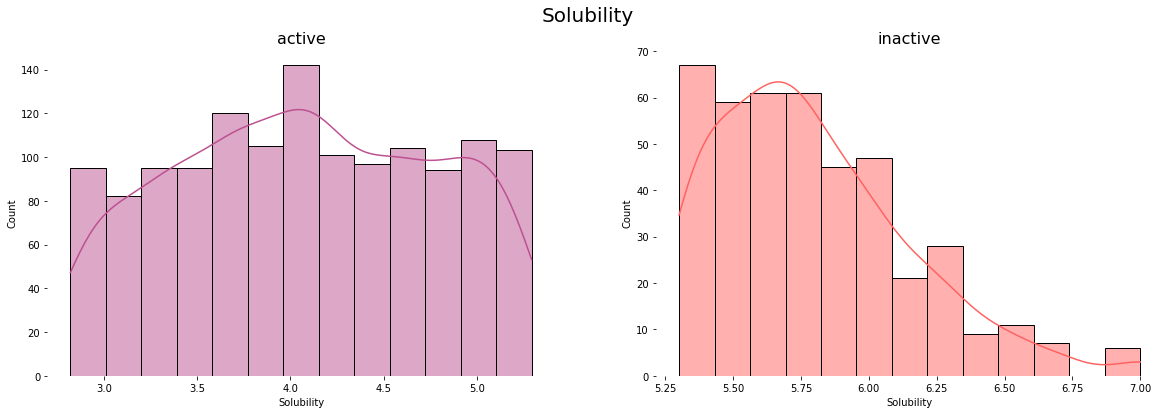

In [25]:
solub_1 = df_solub2[df_solub2['Solubility']<5.3]
solub_2 = df_solub2[df_solub2['Solubility']>=5.3]

fig, axes = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Solubility', fontsize=20)
left = sns.histplot(data=solub_1, x='Solubility', ax = axes[0], kde=True, color=colors_palette[2])
right = sns.histplot(data=solub_2, x='Solubility', ax = axes[1], kde=True, color=colors_palette[1])
axes[0].set_title('active', fontsize=16)
axes[1].set_title('inactive', fontsize=16)

sns.despine(left=True, bottom=True)

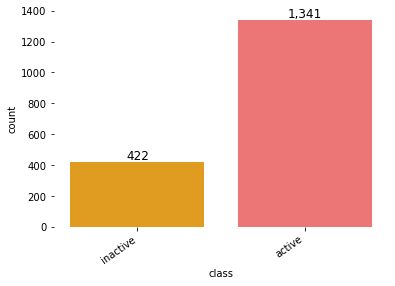

In [26]:
activity_th = []
for i in df_solub2.Solubility:
    if float(i) <5.3:
        activity_th.append("active")
    elif float(i) >=5.3:
        activity_th.append("inactive")
        
activity_class = pd.Series(activity_th, name='class')
class_df = pd.concat([df_solub2, activity_class], axis=1)

a = sns.countplot(x='class', data=class_df, palette=colors_palette)

annotate(a)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);

Text(0, 0.5, 'Solubility value')

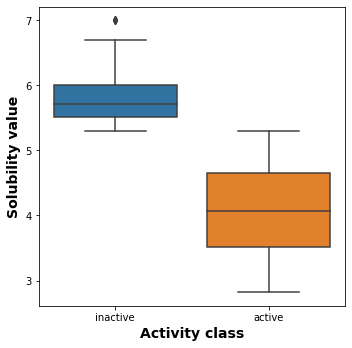

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'Solubility', data = class_df)

plt.xlabel('Activity class', fontsize=14, fontweight='bold')
plt.ylabel('Solubility value', fontsize=14, fontweight='bold')

### 2.1.5 Prepare other fingerprints

In [27]:
df_solub2.rename({'Solubility': 'solubility'}, axis=1, inplace=True)
df_solub_pubch.rename({'Solubility': 'solubility'}, axis=1, inplace=True)
df_solub_klek.rename({'Solubility': 'solubility'}, axis=1, inplace=True)

In [28]:
df_solub_pubch.apply(pd.to_numeric, errors='coerce')
df_solub_pubch = df_solub_pubch.assign(solubility = -np.log10(df_solub_pubch.solubility*(10**-9)))
df_solub_pubch

solubility  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
0       6.301030           1           1           1           1           0   
1       6.045757           1           1           1           0           0   
2       5.958607           1           1           0           0           0   
3       5.853872           1           1           0           0           0   
4       5.823909           1           1           1           0           0   
...          ...         ...         ...         ...         ...         ...   
1758    4.829738           1           1           1           0           0   
1759    4.669586           1           1           1           0           0   
1760    5.958607           1           1           1           0           0   
1761    5.886057           1           1           1           0           0   
1762    5.886057           1           1           1           1           0   

      PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  \
0              0           0           0           0           1            1   
1              0           0           0           0           1            1   
2              0           0           0           0           1            1   
3              0           0           0           0           1            1   
4              0           0           0           0           1            1   
...          ...         ...         ...         ...         ...          ...   
1758           0           0           0           0           1            1   
1759           0           0           0           0           1            1   
1760           0           0           0           0           1            1   
1761           0           0           0           0           1            1   
1762           0           0           0           0           1            1   

      PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  PubchemFP15  \
0               1            1            0            1            1   
1               1            1            0            1            1   
2               1            0            0            1            0   
3               1            1            0            1            1   
4               1            1            0            1            1   
...           ...          ...          ...          ...          ...   
1758            1            1            0            1            1   
1759            1            1            0            1            0   
1760            1            1            0            0            0   
1761            1            1            0            1            1   
1762            1            1            0            1            1   

      PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  PubchemFP20  \
0               1            0            1            1            1   
1               0            0            1            1            0   
2               0            0            1            1            0   
3               0            0            1            1            0   
4               1            0            1            1            0   
...           ...          ...          ...          ...          ...   
1758            1            0            1            0            0   
1759            0            0            1            1            0   
1760            0            0            1            1            0   
1761            0            0            1            0            0   
1762            1            0            1            1            0   

      PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  PubchemFP25  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            1            0            0   
3               0         

In [29]:
df_solub_klek.apply(pd.to_numeric, errors='coerce')
df_solub_klek = df_solub_klek.assign(solubility = -np.log10(df_solub_klek.solubility*(10**-9)))
df_solub_klek

solubility  KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  KRFP8  \
0       6.301030      1      0      0      0      0      0      0      0   
1       6.045757      1      0      0      0      0      0      0      0   
2       5.958607      0      0      0      0      0      0      0      0   
3       5.853872      0      0      0      0      0      0      0      0   
4       5.823909      1      0      0      0      0      0      0      0   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
1758    4.829738      0      0      0      0      0      0      0      0   
1759    4.669586      1      0      0      0      0      0      0      0   
1760    5.958607      1      0      0      0      0      0      0      0   
1761    5.886057      0      0      0      0      0      0      0      0   
1762    5.886057      1      1      0      0      0      0      0      0   

      KRFP9  KRFP10  KRFP11  KRFP12  KRFP13  KRFP14  KRFP15  KRFP16  KRFP17  \
0         0       0       0       0       0       0       0       0       0   
1         0       0       0       0       0       0       0       1       0   
2         0       0       0       0       0       0       0       0       0   
3         0       0       0       0       0       0       0       0       0   
4         0       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
1758      0       0       0       0       0       0       0       0       0   
1759      0       0       0       0       0       0       0       0       0   
1760      0       1       0       0       0       0       0       0       0   
1761      0       0       0       0       0       0       0       0       0   
1762      0       0       0       0       0       1       0       0       0   

      KRFP18  KRFP19  KRFP20  KRFP21  KRFP22  KRFP23  KRFP24  KRFP25  KRFP26  \
0          0       0       0       0       0       0       0       0       0   
1          0       0       1       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1758       0       0       0       0       0       0       0       0       0   
1759       0       0       1       0       0       0       0       0       0   
1760       0       0       0       0       0       0       0       0       0   
1761       0       0       0       0       0       0       0       0       0   
1762       0       0       0       0       0       0       0       0       0   

      KRFP27  KRFP28  KRFP29  KRFP30  KRFP31  KRFP32  KRFP33  KRFP34  KRFP35  \
0          0       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1758       0       0       0       0       0       0       0       0       0   
1759       1       0       0       0       0       0       0       0       0   
1760       0       0       0       0       0       0       1       0       0   
1761       0       0       0       0       0       0       0       0       0   
1762       0       0       0       0       0       0       0       0       0   

      KRFP36  KRFP37  KRFP38  KRFP39  KRFP40  KRFP41  KRFP42  KRFP43  KRFP44  \
0          0       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0  

### 4.1.6 Save

In [30]:
df_solub2.to_csv('../data/processed/solubility_maccs_all.csv', index=False)
df_solub_pubch.to_csv('../data/processed/solubility_pubchem_all.csv', index=False)
df_solub_klek.to_csv('../data/processed/solubility_klek_all.csv', index=False)

## 3. SDF 

Prepare SDF file with mols. 

### 3.1 Load data

In [31]:
suppl = Chem.SDMolSupplier('../data/raw/solubility_for_fingeprint_calculation.sdf')
ms = [x for x in suppl if x is not None]
len(ms)

1763

### 3.2 Preprocess

Convert mols to smiles.

In [32]:
solub_smiles = [MolToSmiles(x,isomericSmiles=False) for x in ms ]
df_solub_smiles = pd.DataFrame(solub_smiles, columns=['smiles'])
df_solub_smiles

smiles
0     Cc1ccc(NC(=O)c2cccc(N3CCOCC3)c2)cc1NC(=O)c1ccc...
1       CN(C)C(=O)C(Cc1ccccc1)NC(=O)c1cc2cc(Br)sc2[nH]1
2               O=C1C(=O)N(Cc2ccc(Br)cc2F)c2c(Cl)cccc21
3                  COc1cc2ncnc(Nc3ccc(Cl)c(O)c3)c2cc1OC
4     CS(=O)(=O)Cc1cc(N2CC3CCC(C2)O3)nc(-c2ccc3[nH]c...
...                                                 ...
1758  COc1cc(N2CCNCC2)ccc1Nc1ncc(Cl)c(-c2cnc3ccccn23)n1
1759        COc1ccc(C(=O)N2CCC(C(=O)c3ccc(F)cc3)CC2)cc1
1760         O=C(CC(c1ccccc1)S(=O)(=O)c1ccccc1)c1ccccc1
1761          Clc1cccc(CNc2[nH]nc3cccc(Oc4ccccc4)c23)c1
1762    COc1ccc(Nc2cc(Oc3cc(C)c(C)nc3-c3ccccn3)ccn2)cc1

[1763 rows x 1 columns]

In [33]:
df_solub_smiles = df_solub_smiles.join(df_solub2['solubility'])
df_solub_smiles

smiles  solubility
0     Cc1ccc(NC(=O)c2cccc(N3CCOCC3)c2)cc1NC(=O)c1ccc...    6.301030
1       CN(C)C(=O)C(Cc1ccccc1)NC(=O)c1cc2cc(Br)sc2[nH]1    6.045757
2               O=C1C(=O)N(Cc2ccc(Br)cc2F)c2c(Cl)cccc21    5.958607
3                  COc1cc2ncnc(Nc3ccc(Cl)c(O)c3)c2cc1OC    5.853872
4     CS(=O)(=O)Cc1cc(N2CC3CCC(C2)O3)nc(-c2ccc3[nH]c...    5.823909
...                                                 ...         ...
1758  COc1cc(N2CCNCC2)ccc1Nc1ncc(Cl)c(-c2cnc3ccccn23)n1    4.829738
1759        COc1ccc(C(=O)N2CCC(C(=O)c3ccc(F)cc3)CC2)cc1    4.669586
1760         O=C(CC(c1ccccc1)S(=O)(=O)c1ccccc1)c1ccccc1    5.958607
1761          Clc1cccc(CNc2[nH]nc3cccc(Oc4ccccc4)c23)c1    5.886057
1762    COc1ccc(Nc2cc(Oc3cc(C)c(C)nc3-c3ccccn3)ccn2)cc1    5.886057

[1763 rows x 2 columns]

### 3.3 Save

In [34]:
df_solub_smiles.to_csv('../data/processed/solubility_smiles_all.csv', index=False)